In [1]:
import numpy as np
import math as mt
def coeff(i):
    return 10+(mt.cos(i)/(i**2+i+1))
n = 100
M=np.zeros((n,n))
M[0,0] = 10
M[n-1,n-1] = 1
M[n-1,n-2] = 1
M[n-2,n-1] = 1
for i in range(1,n-1):
    M[i, i] = coeff(i)
    M[i-1, i] = 1
    M[i, i-1] = 1
np.set_printoptions(suppress=True, precision =4, linewidth=100)
print(M)

[[ 10.       1.       0.     ...,   0.       0.       0.    ]
 [  1.      10.1801   1.     ...,   0.       0.       0.    ]
 [  0.       1.       9.9406 ...,   0.       0.       0.    ]
 ..., 
 [  0.       0.       0.     ...,   9.9999   1.       0.    ]
 [  0.       0.       0.     ...,   1.       9.9999   1.    ]
 [  0.       0.       0.     ...,   0.       1.       1.    ]]


$${\large Задание 4 и 4+}$$

Решить для n=1000 и n=10000 методом Гаусса-Зейделя систему 
$$x_1 = 10$$
$$x_{i-1}+(10+cos(i)/(i^2+i+1))x_i+x_{i+1}= -10+\int_0^5\frac{sin(t+5)}{1+it+it^2}dt, i=\overline{2,n-1}$$
$$x_n = 1$$

Метод Гаусс-Зейделя

Итерационными называются приближенные методы, в которых решение системы получается как предел последовательности векторов $$(x^k)_{k=1}^{\infty}$$, каждый последующий элемент которой вычисляется по некоторому единому правилу. Начальный элемент $$x^1$$ выбирается произвольно.
Условие сходимости
$${\parallel\frac{x^{k+1}-x^{k}}{x^k}\parallel < \epsilon}$$

Покоординатная форма

$$x_1^{k+1} = (b_1-a_{12}x_2^k - ... - a_{1n}x_n^k)/a_{11}$$
$$x_2^{k+1} = (b_2-a_{21}x_2^{k+1} - ... - a_{2n}x_n^k)/a_{22}$$
$$...................................$$
$$x_n^{k+1} = (b_n-a_{n1}x_1^{k+1} - ... - a_{nn-1}x_{n-1}^{k+1})/a_{nn}$$

In [7]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as mt

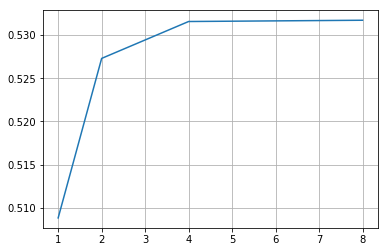

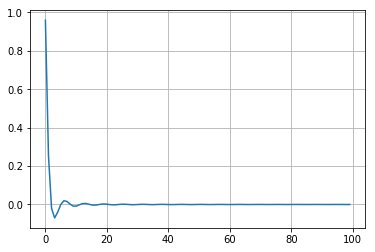

In [3]:
e = 0.001
n = 100
def f(t, p):
    s = np.sin(t-5)/(1+p*t+p*(t**2))
    return s
def integral(i, p):
    s = 0
    l = 5/i
    anach = np.arange(0, 5, l)
    bkonh = np.arange(l, 5+l, l)
    s += ((bkonh-anach)/90)*(7*f(anach, p) + 32*f((3*anach+bkonh)/4, p) + 12*f((anach+bkonh)/2, p) + 32*f((anach+3*bkonh)/4, p)+7*f(bkonh, p))
#     print(s)
    return s
N = np.zeros((n))
y = []
x = []
for k in range (n):
    i=1
    a=1
    b=0
    w=0
    Flag = False
#     print(integral(i, k)/integral(i*2, k)-1)
    while Flag==False :
        b = a
        a = np.sum(integral(i, k))
#         print(a, b, abs(a/b-1))
        if (abs(a/b-1) < e):
            Flag = True
        
        if k==1:
            y.append(np.sum(integral(i, k)))
            x.append(i)
            w= w+1
        i=i*2 
#         print(i)
    N[k]=np.sum(integral(i, k)) - 10
x1 = np.zeros((n))
y1 = np.zeros((n))
for i in range (n):
    x1[i] = i
    y1[i]=f(i, 1)
#     print(N[k])
plt.plot(x, y)
plt.grid()
plt.show()
plt.plot(x1, y1)
plt.grid()
plt.show()

1
2
3
4
5


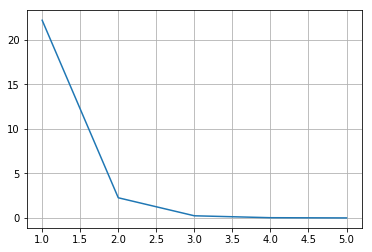

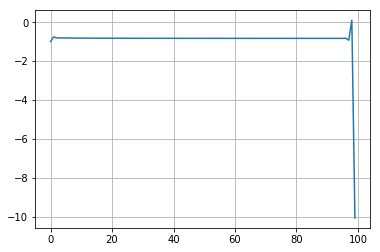

In [4]:
import numpy as np
import math as mt
import copy
import matplotlib.pyplot as plt
xk=np.zeros(n)
for i in range(n):
    xk[i]= 1
xk1 = np.zeros(n)
b = np.zeros(n)
for i in range(n):
    b[i]=1
eps = 0.01
norma = 1
m =0
Norm = list()
x = list()
xx = list()
for i in range(n):
    xx.append(i)
while(norma>eps):
#     Заполняем координаты k+1 вектора
    H = 0
    for i in range(n):
        sum = 0
        for j in range(n):
            if(j <i):
                sum += M[i, j]*xk1[j]  
            if(j>i):
                sum += M[i,j]*xk[j]
        xk1[i] =(N[i] -sum)/M[i, i]
        H+= ((xk1[i]-xk[i]))**2
    norma = mt.sqrt(H)
    Norm.append(norma)
    x.append(m+1)
    xx
    xk = copy.copy(xk1)
    xk1 = np.zeros(n)
    m+=1
    print(m)
# print(xk)
plt.plot(x, Norm)
plt.grid()
plt.show()
plt.plot(xx, xk)
plt.grid()
plt.show()

$${\large Задание 5 и 5+}$$

Построить график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

Решить систему с помощью функции numpy.linalg.solve(…). Результат графически сравнить с решением, полученным в пункте 3. Разницу объяснит.

In [5]:
import numpy as np
b = np.zeros(n)
for i in range(n):
    b[i]=1
prov = np.linalg.solve(M, N)
print(prov)


[ -0.9963  -0.753   -0.806   -0.8087  -0.8094  -0.8093  -0.8106  -0.813   -0.8155  -0.8173  -0.8181
  -0.8184  -0.8188  -0.8196  -0.8205  -0.8213  -0.8218  -0.8221  -0.8223  -0.8226  -0.8231  -0.8236
  -0.824   -0.8242  -0.8243  -0.8245  -0.8248  -0.8251  -0.8253  -0.8255  -0.8256  -0.8257  -0.8259
  -0.8261  -0.8263  -0.8265  -0.8266  -0.8266  -0.8268  -0.8269  -0.8271  -0.8272  -0.8273  -0.8273
  -0.8274  -0.8275  -0.8277  -0.8278  -0.8278  -0.8279  -0.8279  -0.828   -0.8281  -0.8282  -0.8283
  -0.8283  -0.8284  -0.8284  -0.8285  -0.8286  -0.8287  -0.8287  -0.8287  -0.8288  -0.8289  -0.8289
  -0.829   -0.829   -0.829   -0.8291  -0.8291  -0.8292  -0.8292  -0.8293  -0.8293  -0.8293  -0.8294
  -0.8294  -0.8295  -0.8295  -0.8295  -0.8296  -0.8296  -0.8296  -0.8297  -0.8297  -0.8298  -0.8298
  -0.8298  -0.8298  -0.8299  -0.8299  -0.8299  -0.83    -0.8299  -0.831   -0.8205  -0.9243   0.1027
 -10.0641]


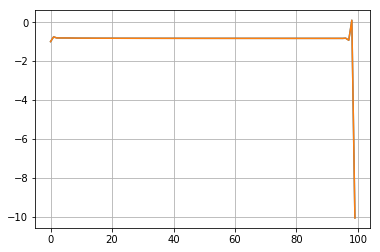

In [6]:
plt.plot(xx, xk)
plt.plot(xx, prov)
plt.grid()
plt.show()